<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 3: Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yixi Liang
</font>
</center>
</p>
</b>

## Google drive

In [1]:
abspath_curr = 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = 'C:/Users/REX/Desktop/teaching-master/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning'

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [4]:
# %tensorflow_version 2.x 
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

C:\Users\REX\Desktop\teaching-master\gwu\machine_learning_I\spring_2022\code\utilities\p3_deep_learning


## Loading the data

In this case study, we will work on the [Plant Seedlings Classification](https://www.kaggle.com/competitions/plant-seedlings-classification/overview).

### Creating the directory for the data

In [7]:
train_path = abspath_curr + '/train/'
test_path = abspath_curr 

In [8]:
for dirpath, dirnames, filenames in os.walk(abspath_curr): 
     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 5 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'.
There are 0 directories and 3 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\.ipynb_checkpoints'.
There are 2 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result'.
There are 0 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\figure'.
There are 0 directories and 1 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model'.
There are 0 directories and 794 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\test'.
There are 12 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train'.
There are 0 directories and 263 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Black-grass'.
There are 0 directories and 390 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Charloc

## Load data  

In [9]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 16, 
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [10]:
data_valid = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                batch_size = 16,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")

Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [11]:
datagen = ImageDataGenerator()
data_test = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [12]:
class_names = data_train.class_names
n_classes = len(class_names)

In [ ]:
class_names

In [ ]:
n_classes

# Training EfficientNetV2B2

In [13]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [14]:
# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetV2B2(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                            

 block2c_expand_activation (Act  (None, None, None,   0          ['block2c_expand_bn[0][0]']      
 ivation)                       128)                                                              
                                                                                                  
 block2c_project_conv (Conv2D)  (None, None, None,   4096        ['block2c_expand_activation[0][0]
                                32)                              ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, None, None,   128        ['block2c_project_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 block2c_add (Add)              (None, None, None,   0           ['block2c_project_bn[0][0]',     
          

                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 224)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 14)     3150        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 224)    3360        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, None, None,   0           ['block4a_activation[0][0]',     
                                224)                              'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_p

                                416)                              'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, None, None,   43264       ['block4c_se_excite[0][0]']      
                                104)                                                              
                                                                                                  
 block4c_project_bn (BatchNorma  (None, None, None,   416        ['block4c_project_conv[0][0]']   
 lization)                      104)                                                              
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_project_bn[0][0]',     
                                104)                              'block4b_add[0][0]']            
          

 block5a_project_bn (BatchNorma  (None, None, None,   480        ['block5a_project_conv[0][0]']   
 lization)                      120)                                                              
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, None, None,   86400       ['block5a_project_bn[0][0]']     
                                720)                                                              
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, None, None,   2880       ['block5b_expand_conv[0][0]']    
 ization)                       720)                                                              
                                                                                                  
 block5b_expand_activation (Act  (None, None, None,   0          ['block5b_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block5d_expand_bn (BatchNormal  (None, None, None,   2880       ['block5d_expand_conv[0][0]']    
 ization)                       720)                                                              
                                                                                                  
 block5d_expand_activation (Act  (None, None, None,   0          ['block5d_expand_bn[0][0]']      
 ivation)                       720)                                                              
                                                                                                  
 block5d_dwconv2 (DepthwiseConv  (None, None, None,   6480       ['block5d_expand_activation[0][0]
 2D)                            720)                             ']                               
                                                                                                  
 block5d_b

 ivation)                       720)                                                              
                                                                                                  
 block5f_dwconv2 (DepthwiseConv  (None, None, None,   6480       ['block5f_expand_activation[0][0]
 2D)                            720)                             ']                               
                                                                                                  
 block5f_bn (BatchNormalization  (None, None, None,   2880       ['block5f_dwconv2[0][0]']        
 )                              720)                                                              
                                                                                                  
 block5f_activation (Activation  (None, None, None,   0          ['block5f_bn[0][0]']             
 )                              720)                                                              
          

 block6b_activation (Activation  (None, None, None,   0          ['block6b_bn[0][0]']             
 )                              1248)                                                             
                                                                                                  
 block6b_se_squeeze (GlobalAver  (None, 1248)        0           ['block6b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6b_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6b_se_squeeze[0][0]']     
                                                                                                  
 block6b_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6b_se_reshape[0][0]']     
                                                                                                  
 block6b_s

                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1248)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_se_reduce (Conv2D)     (None, 1, 1, 52)     64948       ['block6d_se_reshape[0][0]']     
                                                                                                  
 block6d_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6d_se_reduce[0][0]']      
                                                                                                  
 block6d_se_excite (Multiply)   (None, None, None,   0           ['block6d_activation[0][0]',     
                                1248)                             'block6d_se_expand[0][0]']      
                                                                                                  
 block6d_p

 block6f_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6f_se_reduce[0][0]']      
                                                                                                  
 block6f_se_excite (Multiply)   (None, None, None,   0           ['block6f_activation[0][0]',     
                                1248)                             'block6f_se_expand[0][0]']      
                                                                                                  
 block6f_project_conv (Conv2D)  (None, None, None,   259584      ['block6f_se_excite[0][0]']      
                                208)                                                              
                                                                                                  
 block6f_project_bn (BatchNorma  (None, None, None,   832        ['block6f_project_conv[0][0]']   
 lization)                      208)                                                              
          

 block6h_project_conv (Conv2D)  (None, None, None,   259584      ['block6h_se_excite[0][0]']      
                                208)                                                              
                                                                                                  
 block6h_project_bn (BatchNorma  (None, None, None,   832        ['block6h_project_conv[0][0]']   
 lization)                      208)                                                              
                                                                                                  
 block6h_add (Add)              (None, None, None,   0           ['block6h_project_bn[0][0]',     
                                208)                              'block6g_add[0][0]']            
                                                                                                  
 block6i_expand_conv (Conv2D)   (None, None, None,   259584      ['block6h_add[0][0]']            
          

                                                                                                  
 block6j_add (Add)              (None, None, None,   0           ['block6j_project_bn[0][0]',     
                                208)                              'block6i_add[0][0]']            
                                                                                                  
 top_conv (Conv2D)              (None, None, None,   292864      ['block6j_add[0][0]']            
                                1408)                                                             
                                                                                                  
 top_bn (BatchNormalization)    (None, None, None,   5632        ['top_conv[0][0]']               
                                1408)                                                             
                                                                                                  
 top_activ

In [15]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

In [16]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

In [18]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 35s 81ms/step - loss: 0.8868 - accuracy: 0.7132 - val_loss: 0.2867 - val_accuracy: 0.9095 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 15s 63ms/step - loss: 0.3796 - accuracy: 0.8747 - val_loss: 0.4075 - val_accuracy: 0.8874 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 15s 64ms/step - loss: 0.1715 - accuracy: 0.9479 - val_loss: 0.1659 - val_accuracy: 0.9568 - lr: 1.0000e-03
Epoch 4/5
238/238 [==============================] - 16s 66ms/step - loss: 0.1368 - accuracy: 0.9613 - val_loss: 0.1510 - val_accuracy: 0.9684 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 16s 65ms/step - loss: 0.1269 - accuracy: 0.9671 - val_loss: 0.1448 - val_accuracy: 0.9695 - lr: 1.0000e-03


In [20]:
#Evaluate on full data
model.evaluate(data_valid)

60/60 [==============================] - 3s 51ms/step - loss: 0.1448 - accuracy: 0.9695


[0.14480645954608917, 0.969473659992218]

In [21]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

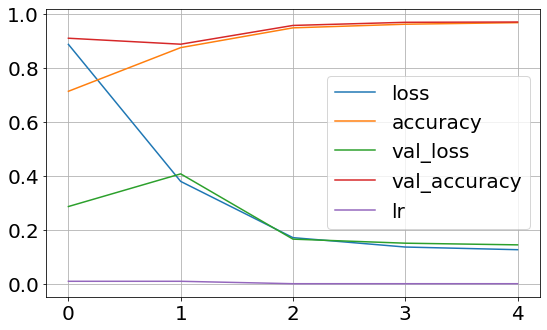

In [22]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-test2.pdf')
plt.show()

## Unfreezing the pretrained layers

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 32)

Found 4750 files belonging to 12 classes.


In [23]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [24]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [25]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 60s 191ms/step - loss: 0.6270 - accuracy: 0.8179 - val_loss: 0.1438 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 42s 177ms/step - loss: 0.2241 - accuracy: 0.9229 - val_loss: 0.1040 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 43s 178ms/step - loss: 0.1571 - accuracy: 0.9479 - val_loss: 0.0191 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 4/12
238/238 [==============================] - 43s 181ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.0309 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/12
238/238 [==============================] - 43s 180ms/step - loss: 0.0412 - accuracy: 0.9855 - val_loss: 0.0150 - val_accuracy: 0.9979 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 42s 177ms/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 0.0138 - val_accuracy: 0.9979 - lr: 1.0000e-04
Epoch 7/12
238/238 [========================

## Plotting the learning curve

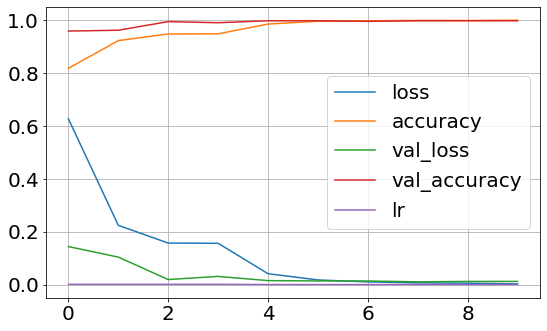

In [26]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

## Loading the saved model

In [28]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

In [29]:
#Prepare the Test data using Tensorflow Image Generator

datagen = ImageDataGenerator()
data_test = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [30]:
prediction = model.predict(data_test)
prediction.shape

(794, 12)

In [31]:
class_names[tf.argmax(prediction[2])]

'Sugar beet'

In [32]:
#Read sample submission file 
sample_submission = pd.read_csv(abspath_curr + '/sample_submission.csv')
sample_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [33]:
len(sample_submission)

794

In [34]:
#Prepare prediction results
predict_class = []
for pred in prediction: 
    predict_class.append(class_names[tf.argmax(pred)])

predict_class[:10]

['Small-flowered Cranesbill',
 'Fat Hen',
 'Sugar beet',
 'Common Chickweed',
 'Sugar beet',
 'Loose Silky-bent',
 'Common Chickweed',
 'Fat Hen',
 'Black-grass',
 'Loose Silky-bent']

In [35]:
submission = pd.DataFrame({'file':sample_submission['file'],'species':predict_class})
submission.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


In [36]:
submission.to_csv(abspath_curr + '/submission.csv', index=False)